In [98]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [12]:
wine_data = pd.read_csv('./data/winequality-red.csv')

In [59]:
wine_data.shape

(1599, 12)

In [13]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [48]:

features = ['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol',]

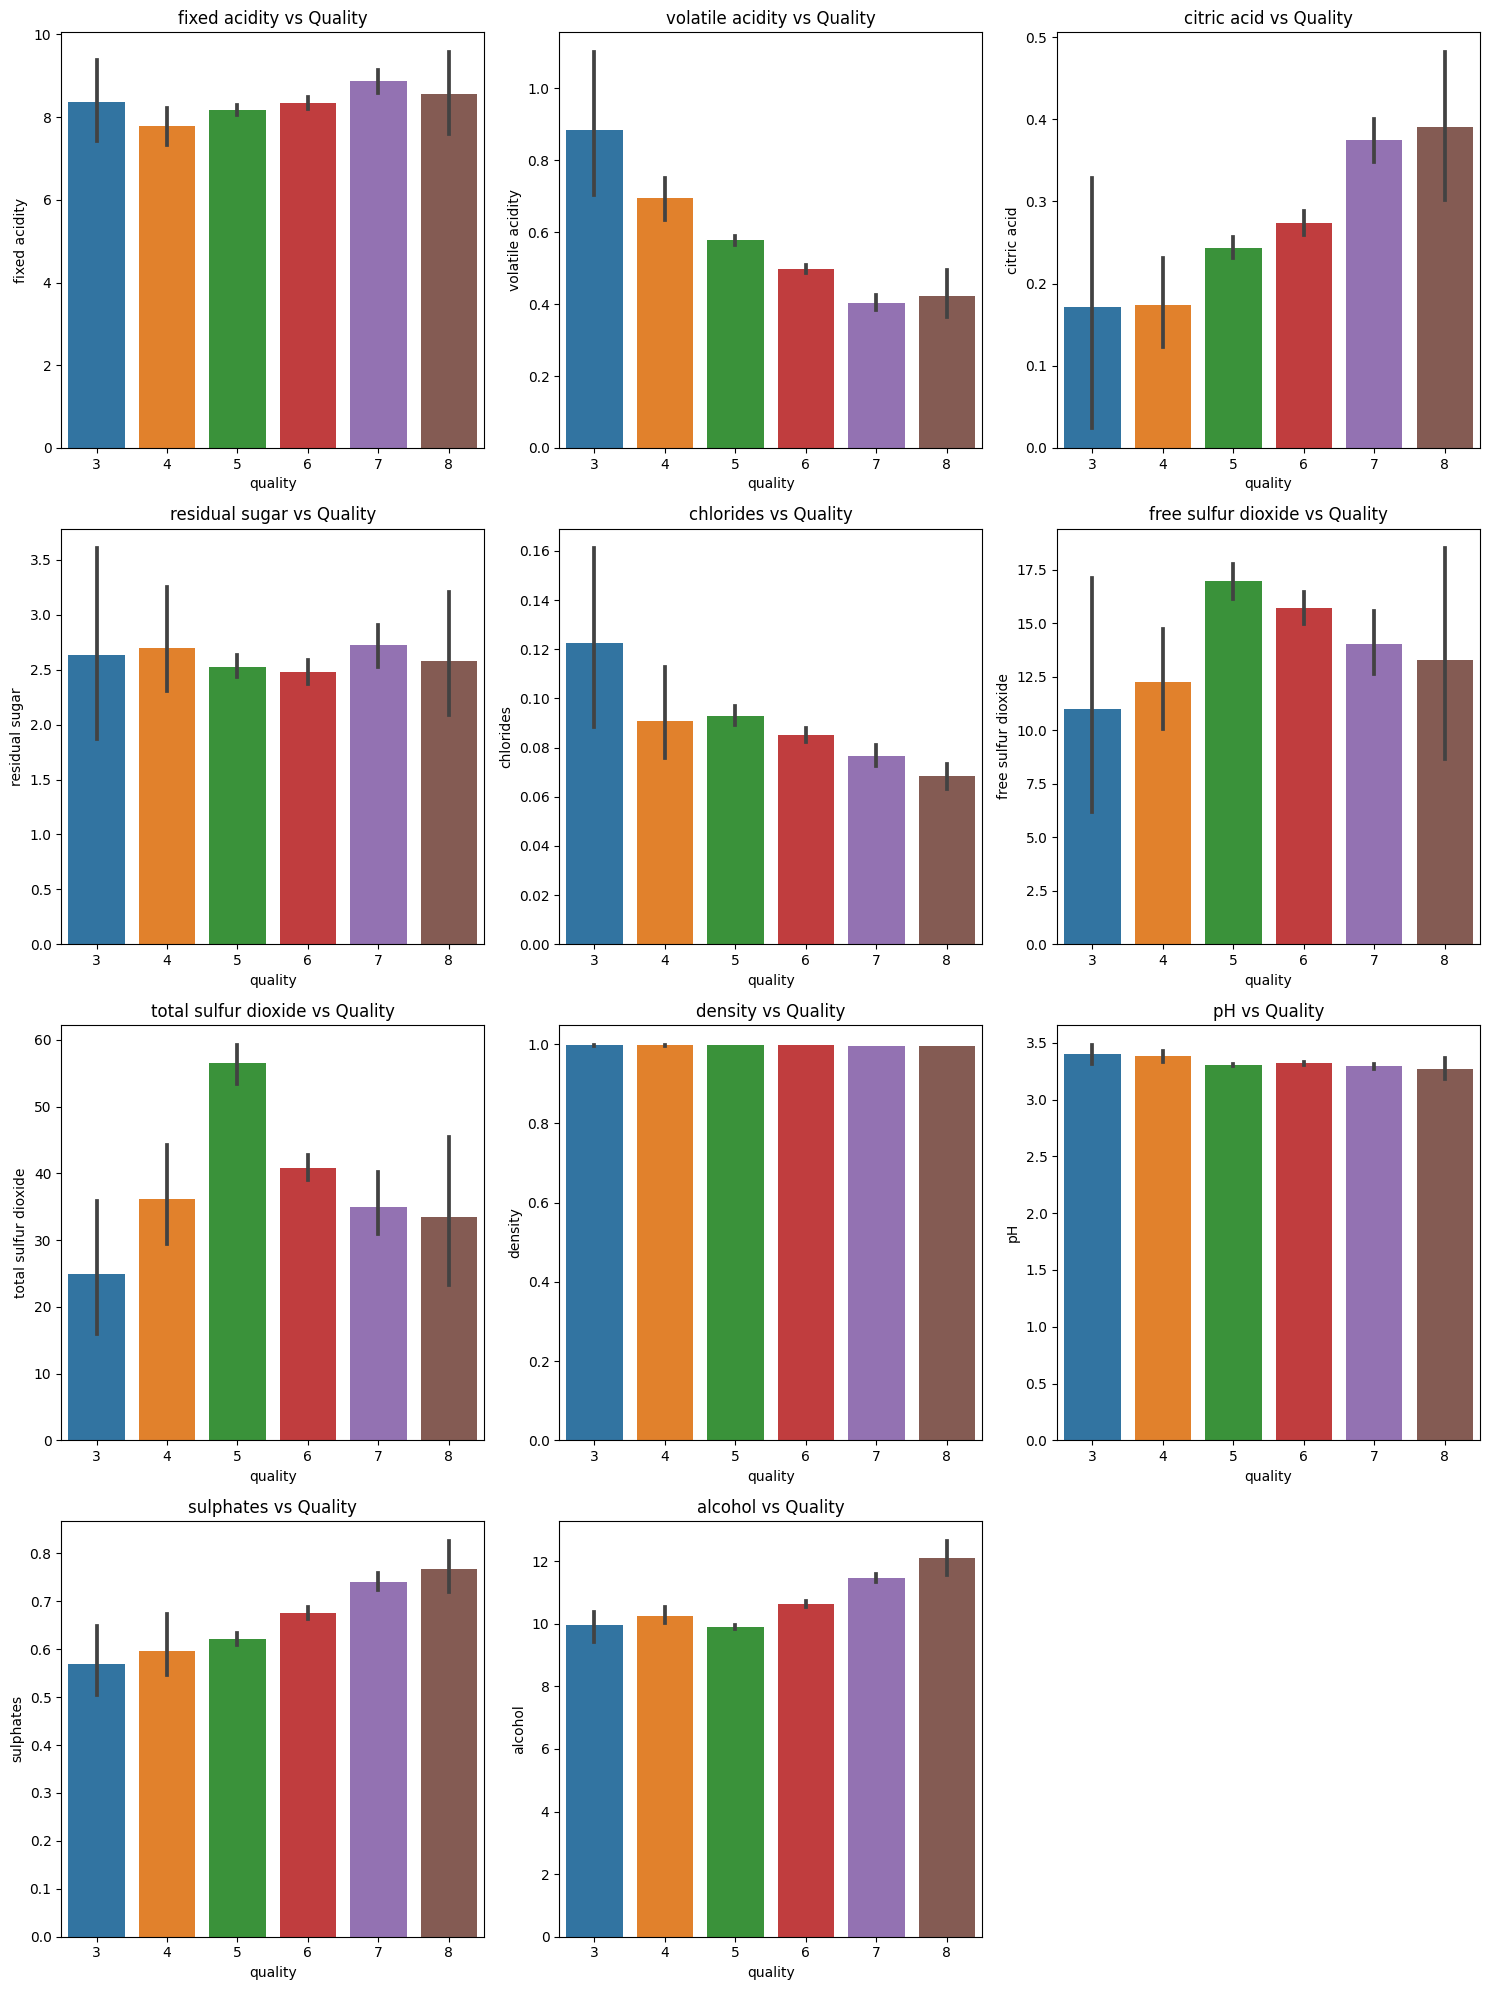

In [39]:
# Number of features to plot
num_features = len(features)

# Define number of columns per row (adjust if needed)
cols = 3  

# Calculate number of required rows
rows = math.ceil(num_features / cols)

# Create subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# Flatten axes for easy iteration (in case of multiple rows)
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=wine_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Quality')

# Hide any unused subplot axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

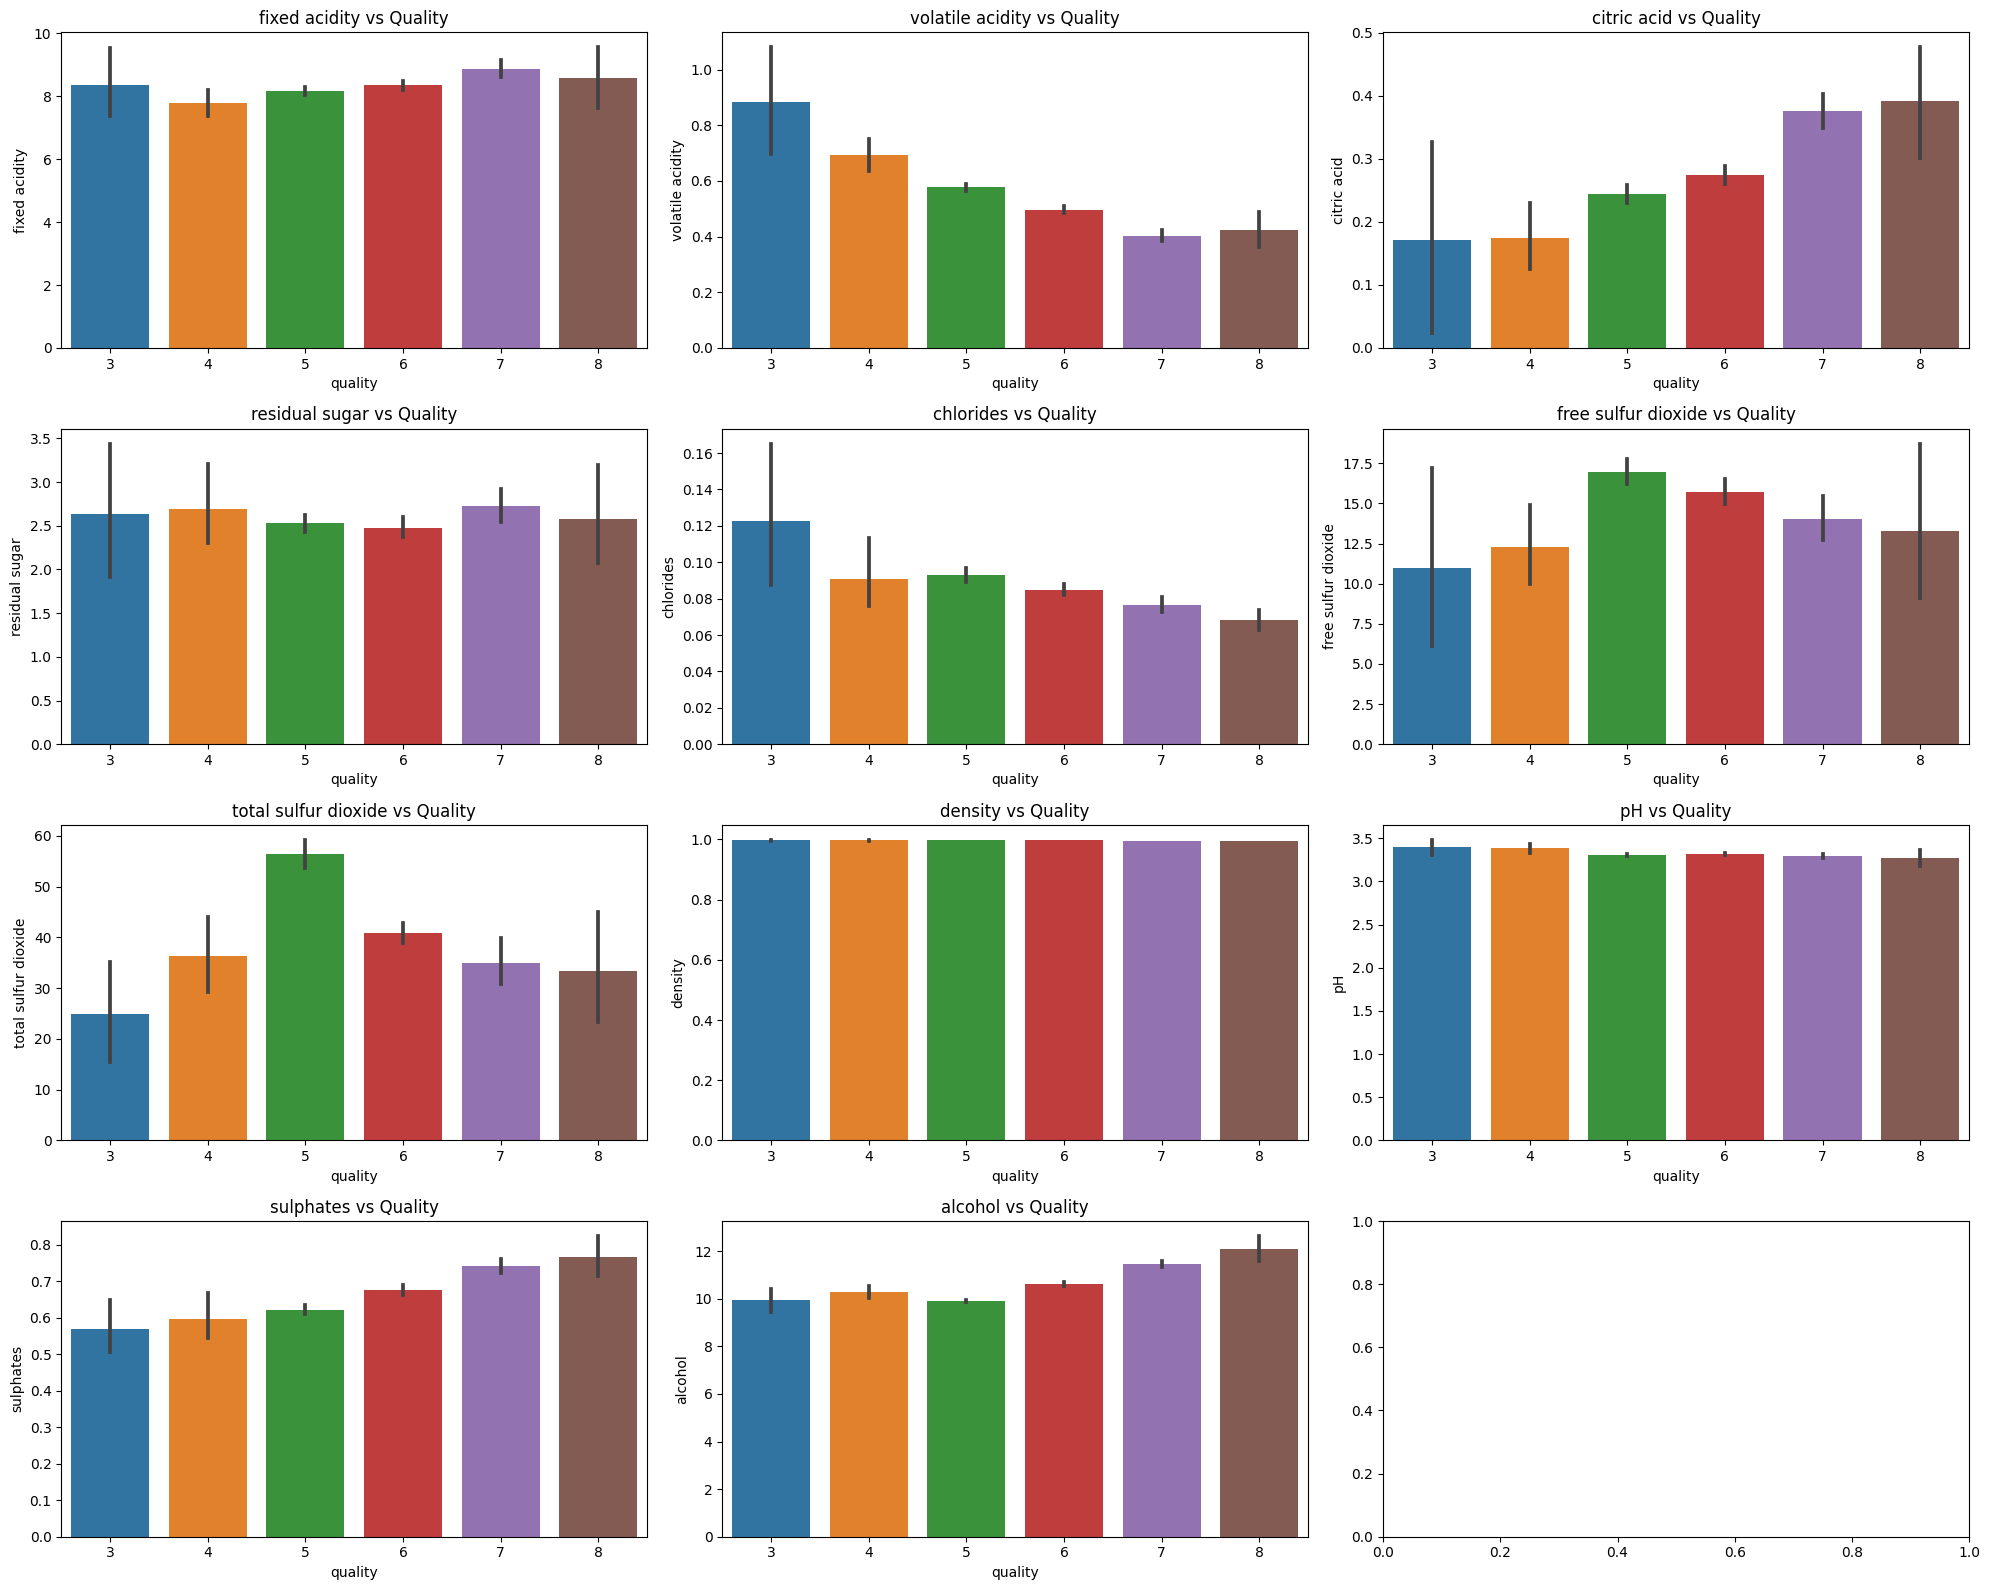

In [50]:
fig, axes = plt.subplots(4, 3, figsize=(20, 16))

# Flatten the 2D array into 1D so you can access axes[0], axes[1], ...
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=wine_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Quality')

plt.tight_layout()
plt.show()

<AxesSubplot: >

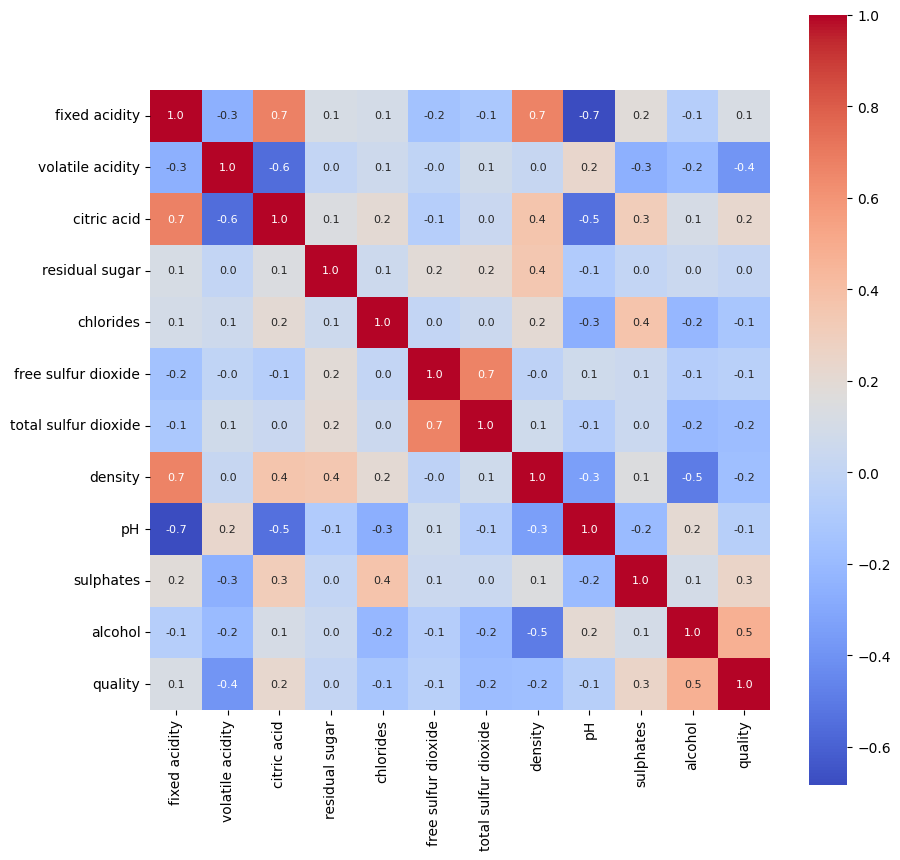

In [55]:
plt.figure(figsize=(10, 10))
sns.heatmap(wine_data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws= {'size': 8 }, cmap="coolwarm")

In [56]:
X = wine_data.drop('quality', axis=1)
Y = wine_data["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [57]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [58]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [73]:
model = RandomForestClassifier()

In [74]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [77]:
x_train_prediction = model.predict(X_test)
x_train_accuracy = accuracy_score(x_train_prediction, Y_test)

In [78]:
print(x_train_accuracy)

0.93125


In [93]:
classification_rep = classification_report(x_train_prediction, Y_test)

In [94]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       297
           1       0.51      0.83      0.63        23

    accuracy                           0.93       320
   macro avg       0.75      0.88      0.80       320
weighted avg       0.95      0.93      0.94       320



In [97]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(x_train_prediction, Y_test)

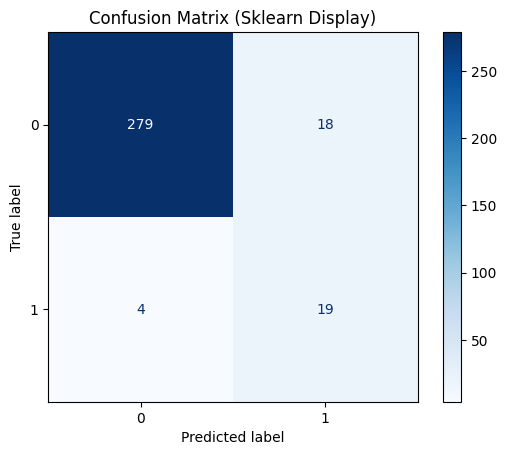

In [99]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Sklearn Display)")
plt.show()

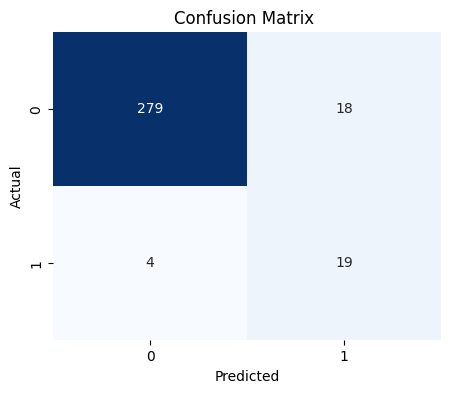

In [100]:
# 5️⃣ Plot Confusion Matrix (option B - with seaborn heatmap)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [82]:
data = [8.9,0.62,0.18,3.8,0.17600000000000002,52.0,145.0,0.9986,3.16,0.88,9.2]

input_data = np.asanyarray(data)
transformed_data = input_data.reshape(1, -1)

prediction = model.predict(transformed_data)
print(prediction)
if prediction[0] == 0:
    print("Bad wine quality")
else:
    print("Good wine quality")

[0]
Bad wine quality


/home/theoutcast/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
